# Decision Tree
* 의사결정나무(Decision tree)는 __분류__<sup>classification</sup>와 __회귀__<sup>regression</sup> 두 가지 다 적용 가능함
* __분류 트리(Classification tree)__ 는 출력 결과로 입력 데이터가 분류되는 클래스를 출력
* __회귀 트리(Regression tree)__ 는 출력 결과로 특정 의미를 지니는 실수 값을 출력 (ex. 주택의 가격 등)
* scikit-learn에는 [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) 와 [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) 에 구현되어 있음

In [10]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn

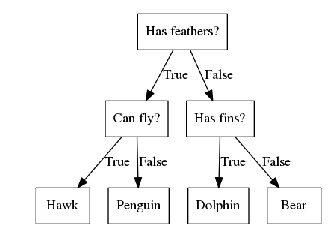

In [11]:
mglearn.plots.plot_animal_tree()

## 1. Decision tree 만들기
* mglearn이 제공하는 *two_moons* 데이터셋을 이용하여 __Regression tree__ 구현

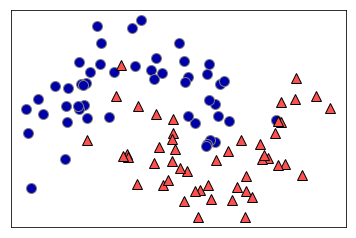

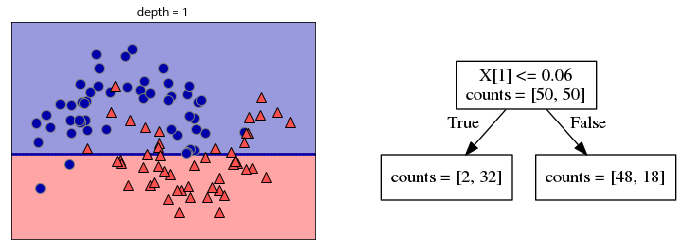

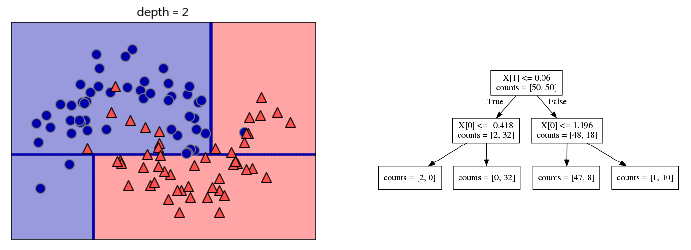

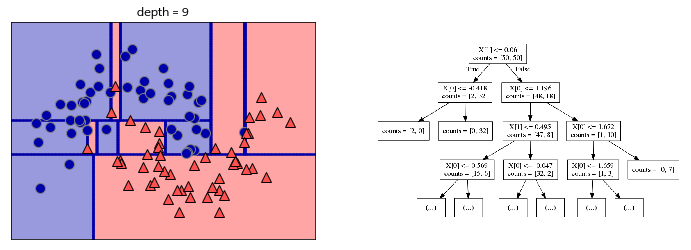

In [12]:
mglearn.plots.plot_tree_progressive()

## 2. Decision tree의 복잡도 제어하기
* 일반적으로 Tree의 깊이가 깊어질 수록 다른 말로 Leaf node가 *pure node* 가 될 때까지 진행하면 모델은 매우 복잡해지고, Training set에 **overfitting** 됨
* overfitting을 방지하기 위해 트리 생성을 조기에 중단하는 __pre-prunning__ 방법과 트리를 만든 후 노드를 삭제해 나가는 __post-prunning__(또는 그냥 prunning) 방법이 있음
* __pre-prunning__의 경우에는 트리의 최대 깊이나 리프(leaf)의 최대 개수를 제한
* scikit-learn은 __pre-prunning__ 방법만 지원함

In [14]:
# 유방암 데이터 셋을 이용하여 pre-prunning으로 제어
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


#### maxt_depth=4 로 트리 깊이 제한

In [15]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


## 3. Decision tree 분석
* scikit-learn에서 tree 모듈의 __export_graphviz__ 함수를 이용하여 트리를 시각화 할 수 있음
* `export_graphviz` 함수는 그래프 저장용 텍스트 파일 포맷인 *.dot* 파일을 생성
* **graphviz** 모듈을 이용하여 *.dot* 파일을 읽어 시각화 `pip install graphviz`

In [16]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

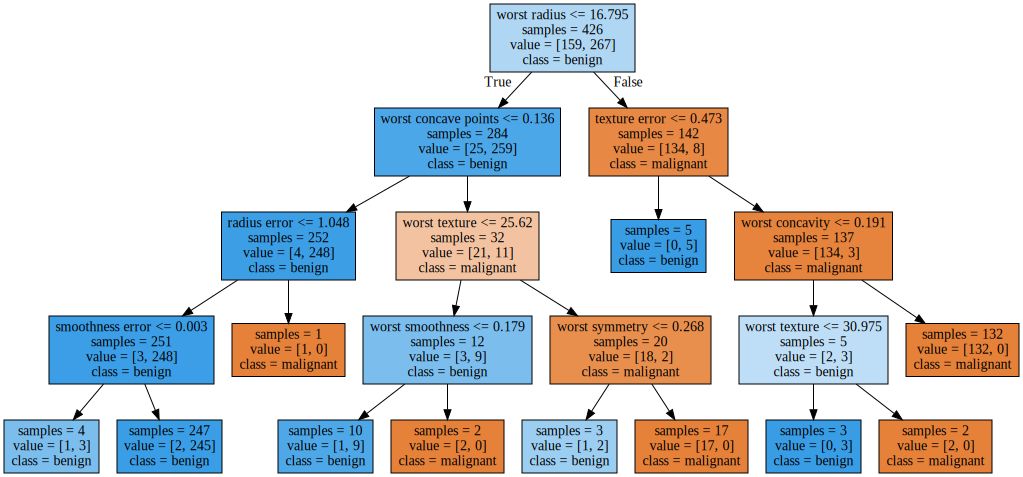

In [17]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 4. Tree 특성(feature)의 중요도
* scikit-learn에서는 feature의 중요도(importance)를 `feature_importances_` 로 제공해줌
* [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)에서 확인할 수 있듯이 *Gini index*(지니 계수)를 계산
$$ G.I(A)=\sum _{ i=1 }^{ d }{ { \left( { R }_{ i }\left( 1-\sum _{ k=1 }^{ m }{ { p }_{ ik }^{ 2 } }  \right)  \right)  } } $$ 

In [18]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.01
  0.048  0.     0.     0.002  0.     0.     0.     0.     0.     0.727
  0.046  0.     0.     0.014  0.     0.018  0.122  0.012  0.   ]


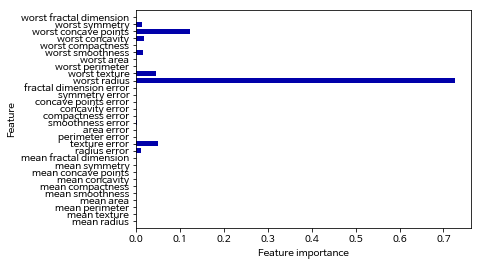

In [19]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)